# Normalization

In [1]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets, normalized_contours
from melodic_contour import *
from sklearn import metrics

In [2]:
def random_int_contour(N=50, n=10, p=0.5):
    contour = np.zeros((N,))
    contour[0] = np.random.randint(60,85)
    for i in range(1, N):
        step = np.random.binomial(n, p) - n*p
        step = min(max(-12, step), 12)
        if (contour[i-1] + step > 84) or (contour[i-1] + step < 60):
            contour[i] = contour[i-1] - step
        else:
            contour[i] = contour[i-1] + step
    return contour

In [3]:
def show_contours(contours, N=500):
    plt.plot(contours[:N, :].T, c='k', lw=.1, alpha=.1);
    plt.plot(contours[0,:], 'k', lw=.5)
    plt.plot(contours[1,:], 'k--', lw=.5)
    plt.plot(contours.mean(axis=0), lw=2, c='C3', label='mean')
    sns.despine()

In [23]:
random_contours = np.asarray([random_int_contour() for _ in range(5000)])

In [5]:
dfs, contours = load_datasets()

In [43]:
dfs.keys()

dict_keys(['erk', 'erk-random', 'boehme', 'boehme-random', 'creighton', 'creighton-random', 'han', 'han-random', 'natmin', 'natmin-random', 'shanxi', 'shanxi-random', 'essen-europe', 'essen-europe-random', 'essen-china', 'essen-china-random', 'essen-europe-china', 'essen-europe-china-random', 'liber-antiphons', 'liber-antiphons-random', 'liber-responsories', 'liber-responsories-random', 'liber-alleluias', 'liber-alleluias-random'])

In [15]:
start_index = list(dfs['erk'].columns).index('0')
erk_contours = dfs['erk'].iloc[:, start_index:].values

In [45]:
start_index = list(dfs['erk'].columns).index('0')
erk_random_contours = dfs['erk-random'].iloc[:, start_index:].values

Problem in random data: number of steps should be number of notes!

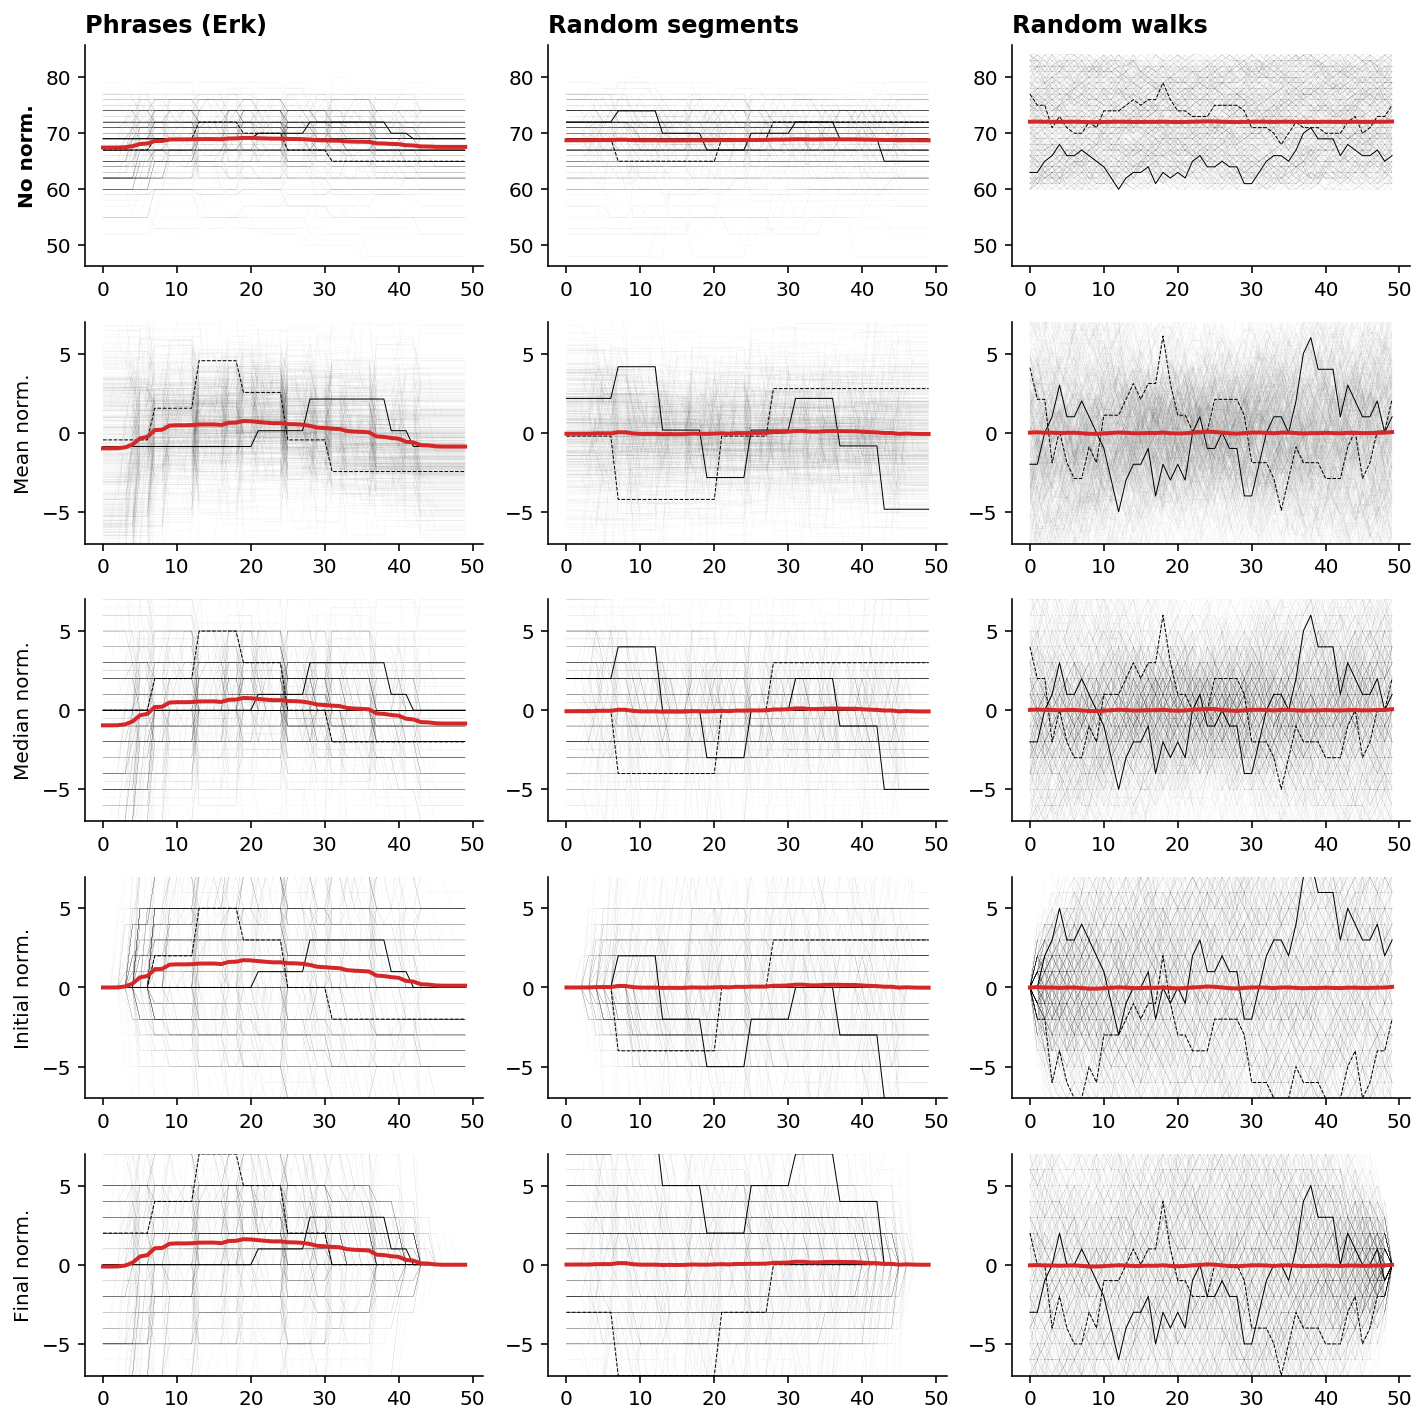

In [50]:
plt.figure(figsize=(10, 10))
ylim = (-7, 7)

# Unnormalized

ax1a = plt.subplot2grid((5, 3), (0, 0))
show_contours(erk_contours, N=N)
plt.title('Phrases (Erk)', fontweight='bold', ha='left', x=0)
plt.ylabel('No norm.', fontweight='bold')

ax1c = plt.subplot2grid((5, 3), (0, 1), sharey=ax1a)
show_contours(erk_random_contours, N=N)
plt.title('Random segments', fontweight='bold', ha='left', x=0)

ax1c = plt.subplot2grid((5, 3), (0,2), sharey=ax1a)
show_contours(random_contours, N=N)
plt.title('Random walks', fontweight='bold', ha='left', x=0)

# Mean 

ax2a = plt.subplot2grid((5, 3), (1, 0))
show_contours(erk_contours - erk_contours.mean(axis=1)[:, np.newaxis], N=N)
plt.ylabel('Mean norm.')
plt.ylim(*ylim)

ax2b = plt.subplot2grid((5, 3), (1, 1), sharey=ax2a)
show_contours(erk_random_contours - erk_random_contours.mean(axis=1)[:, np.newaxis], N=N)

ax2c = plt.subplot2grid((5, 3), (1, 2), sharey=ax2a)
show_contours(random_contours - random_contours.mean(axis=1)[:, np.newaxis], N=N)

# Median

ax3a = plt.subplot2grid((5, 3), (2, 0))
show_contours(erk_contours - np.median(erk_contours, axis=1)[:, np.newaxis], N=N)
plt.ylabel('Median norm.')
plt.ylim(*ylim)

ax3b = plt.subplot2grid((5, 3), (2, 1), sharey=ax3a)
show_contours(erk_random_contours - np.median(erk_random_contours, axis=1)[:, np.newaxis], N=N)

ax3c = plt.subplot2grid((5, 3), (2, 2), sharey=ax3a)
show_contours(random_contours - np.median(random_contours, axis=1)[:, np.newaxis], N=N)


# Initial

ax4a = plt.subplot2grid((5, 3), (3, 0))
show_contours(erk_contours - erk_contours[:, 0][:, np.newaxis], N=N)
plt.ylabel('Initial norm.')
plt.ylim(*ylim)

ax4b = plt.subplot2grid((5, 3), (3,1), sharey=ax4a)
show_contours(erk_random_contours - erk_random_contours[:, 0][:, np.newaxis], N=N)

ax4c = plt.subplot2grid((5, 3), (3,2), sharey=ax4a)
show_contours(random_contours - random_contours[:, 0][:, np.newaxis], N=N)

# Final

ax5a = plt.subplot2grid((5, 3), (4, 0))
show_contours(erk_contours - erk_contours[:, -1][:, np.newaxis], N=N)
plt.ylabel('Final norm.')
plt.ylim(*ylim)

ax5b = plt.subplot2grid((5, 3), (4,1), sharey=ax5a)
show_contours(erk_random_contours - erk_random_contours[:, -1][:, np.newaxis], N=N)

ax5c = plt.subplot2grid((5, 3), (4,2), sharey=ax5a)
show_contours(random_contours - random_contours[:, -1][:, np.newaxis], N=N)


plt.tight_layout()

TypeError: unhashable type: 'slice'

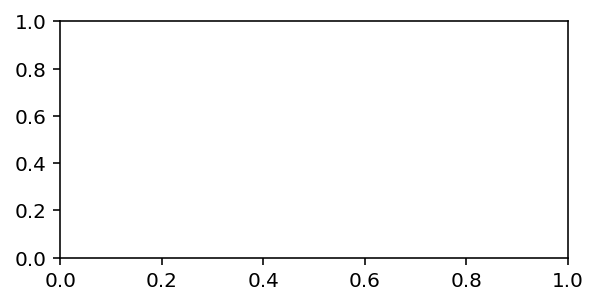

In [6]:
N=500

plt.figure(figsize=(10,10))
plt.subplot(421)
show_contours(erk_contours, N=N)
plt.title('No normalization')

plt.subplot(422)
C = contours - contours.mean(axis=1)[:, np.newaxis]
show_contours(C, N=N)
plt.title('Mean normalization')


plt.subplot(423)
C = contours - np.median(contours, axis=1)[:, np.newaxis]
show_contours(C, N=N)
plt.title('Median normalization')

plt.subplot(424)
C = contours - contours[:, -1][:, np.newaxis]
show_contours(C, N=N)
plt.title('Final normalization')


plt.tight_layout()